In [42]:
# importing pandas and other libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.image as mpimg

import requests
import os

import math

# using pands read_csv function to load the dataset
df = pd.read_csv("pokemon.csv")
df.head()

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1194 non-null   int64 
 1   image_url   1194 non-null   object
 2   Id          1194 non-null   int64 
 3   Names       1194 non-null   object
 4   Type1       1194 non-null   object
 5   Type2       652 non-null    object
 6   Total       1194 non-null   int64 
 7   HP          1194 non-null   int64 
 8   Attack      1194 non-null   int64 
 9   Defense     1194 non-null   int64 
 10  Sp. Atk     1194 non-null   int64 
 11  Sp. Def     1194 non-null   int64 
 12  Speed       1194 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 121.4+ KB


In [4]:
df.isnull().sum()

Unnamed: 0      0
image_url       0
Id              0
Names           0
Type1           0
Type2         542
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
dtype: int64

In [6]:
# Assign None to Type2 since we have 542 not assigned
df["Type2"].fillna("None", inplace=True)

In [7]:
# Check if none is properly assigned
df.isnull().sum()

Unnamed: 0    0
image_url     0
Id            0
Names         0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
dtype: int64

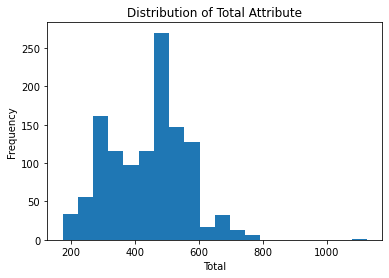

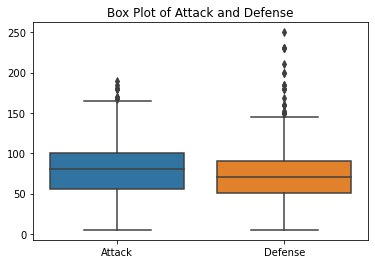

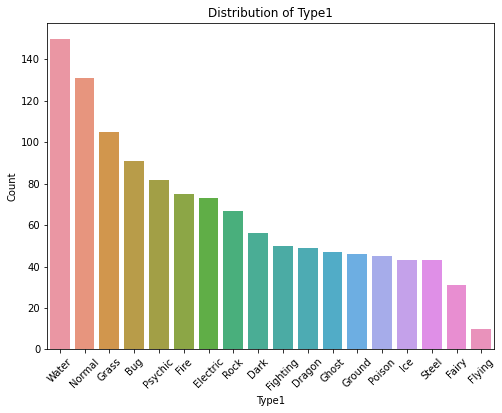

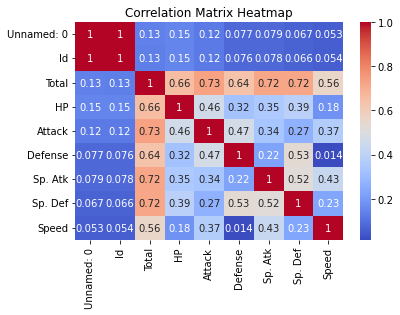

In [10]:
# Histogram of the "Total" attribute
plt.hist(df["Total"], bins=20)
plt.xlabel("Total")
plt.ylabel("Frequency")
plt.title("Distribution of Total Attribute")
plt.show()

# Box plot of the "Attack" and "Defense" attributes
sns.boxplot(data=df[["Attack", "Defense"]])
plt.title("Box Plot of Attack and Defense")
plt.show()

# Bar chart of the "Type1" attribute
type1_counts = df["Type1"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=type1_counts.index, y=type1_counts.values)
plt.xlabel("Type1")
plt.ylabel("Count")
plt.title("Distribution of Type1")
plt.xticks(rotation=45)
plt.show()

# Correlation matrix heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


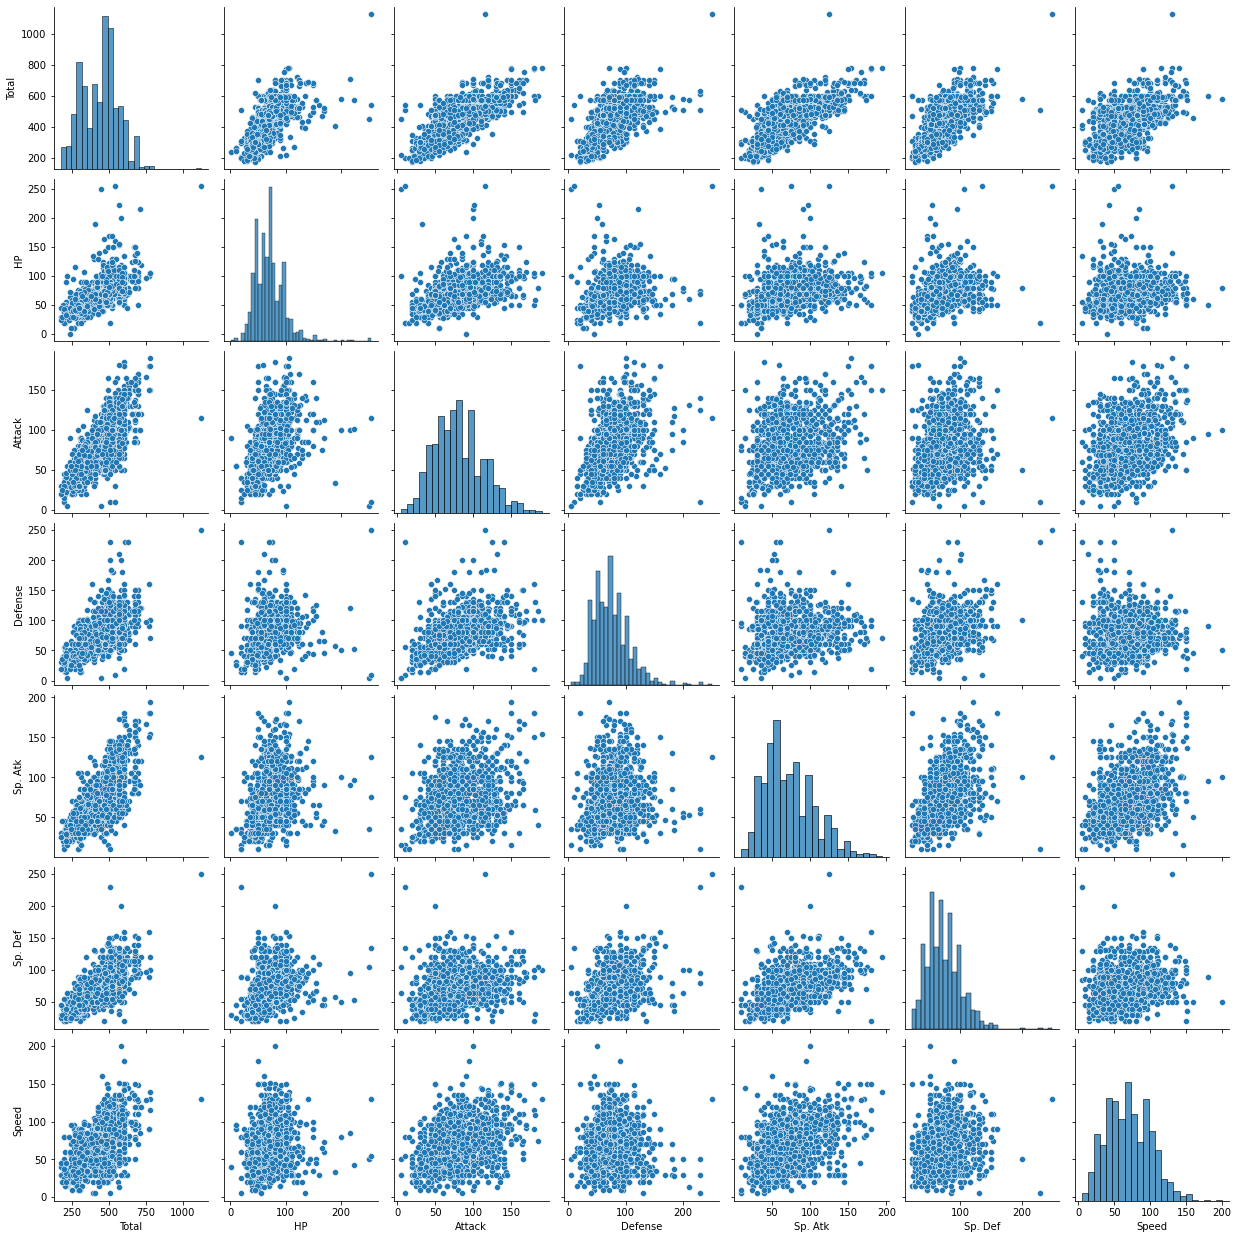

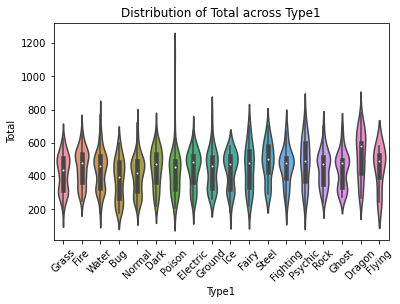

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points

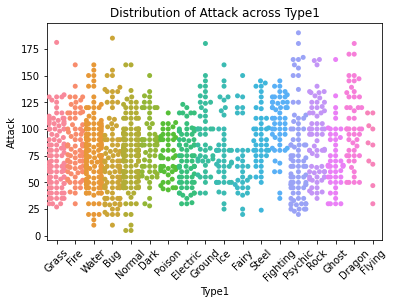

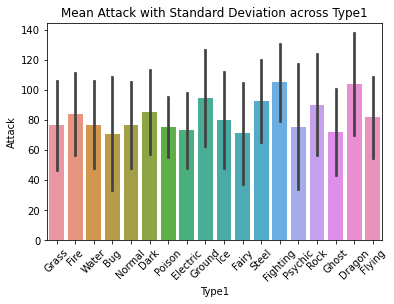

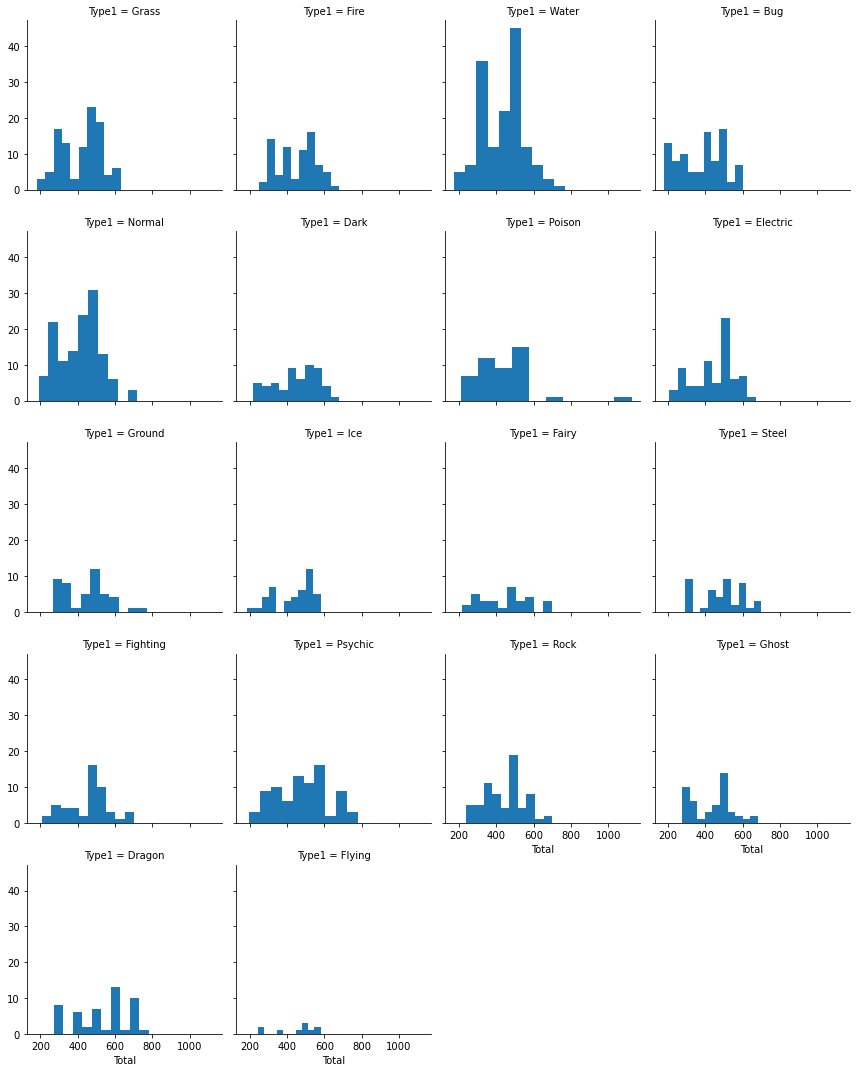

In [11]:
# Adding more options for EDA for better exploration
#sample1
sns.pairplot(df[numerical_columns])
plt.show()

#sample2
sns.violinplot(x="Type1", y="Total", data=df)
plt.xlabel("Type1")
plt.ylabel("Total")
plt.title("Distribution of Total across Type1")
plt.xticks(rotation=45)
plt.show()

#sample3
sns.swarmplot(x="Type1", y="Attack", data=df)
plt.xlabel("Type1")
plt.ylabel("Attack")
plt.title("Distribution of Attack across Type1")
plt.xticks(rotation=45)
plt.show()

#sample4
sns.barplot(x="Type1", y="Attack", data=df, ci="sd")
plt.xlabel("Type1")
plt.ylabel("Attack")
plt.title("Mean Attack with Standard Deviation across Type1")
plt.xticks(rotation=45)
plt.show()

#sample5
g = sns.FacetGrid(df, col="Type1", col_wrap=4)
g.map(plt.hist, "Total")
plt.show()

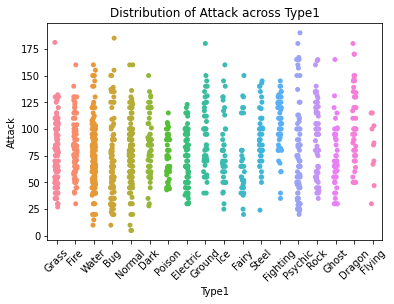

In [12]:
sns.stripplot(x="Type1", y="Attack", data=df, jitter=True)
plt.xlabel("Type1")
plt.ylabel("Attack")
plt.title("Distribution of Attack across Type1")
plt.xticks(rotation=45)
plt.show()

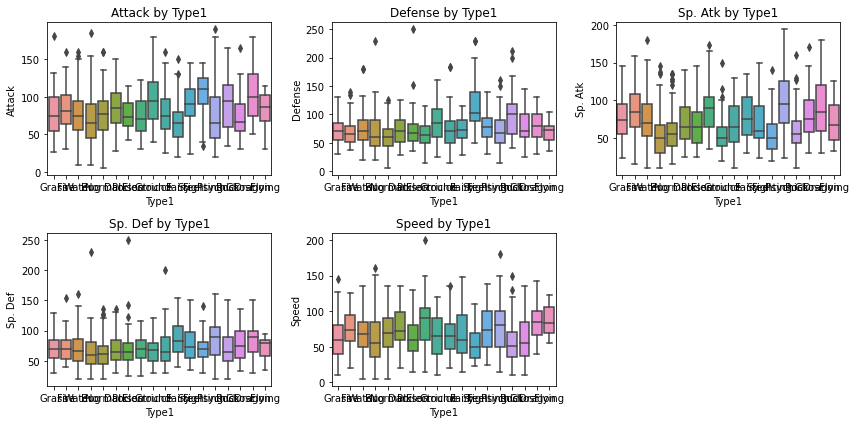

In [13]:
# Box plot for Attack, Defense, Sp. Atk, Sp. Def, and Speed by Type1
attributes = ["Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
plt.figure(figsize=(12, 6))
for i, attr in enumerate(attributes):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x="Type1", y=attr, data=df)
    plt.title(f"{attr} by Type1")
    plt.xlabel("Type1")
    plt.ylabel(attr)

plt.tight_layout()
plt.show()

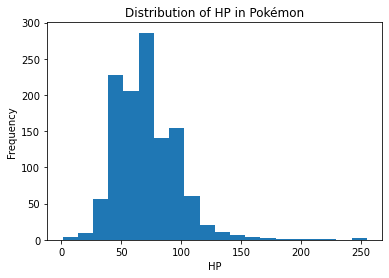

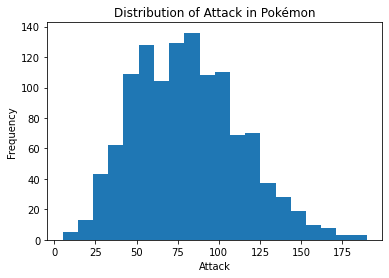

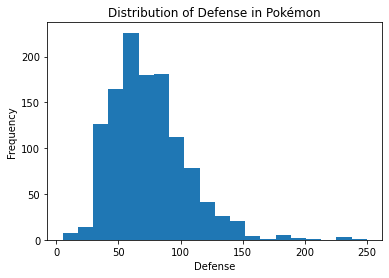

In [34]:
# Select the attributes for distribution visualization
attributes = ['HP', 'Attack', 'Defense']

# Create histograms for each attribute
for attribute in attributes:
    plt.hist(df[attribute], bins=20)
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attribute} in Pokémon')
    plt.show()

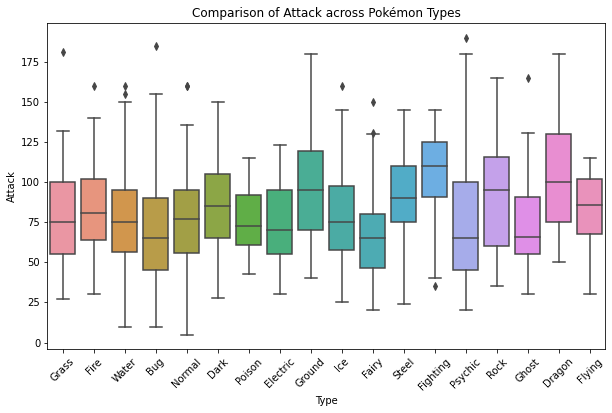

In [36]:
# Select the attribute and category for comparison
attribute = 'Attack'
category_column = 'Type1'  # Replace with 'Type2' if you want to compare based on the secondary type

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=category_column, y=attribute, data=df)
plt.xlabel('Type')
plt.ylabel(attribute)
plt.title(f'Comparison of {attribute} across Pokémon Types')
plt.xticks(rotation=45)
plt.show()

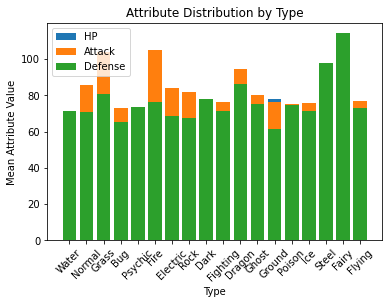

In [40]:
# Stacked bar plot of attribute distribution by type
type_counts = df['Type1'].value_counts()
attributes = ['HP', 'Attack', 'Defense']

fig, ax = plt.subplots()
for attribute in attributes:
    ax.bar(type_counts.index, df.groupby('Type1')[attribute].mean(), label=attribute)

plt.title('Attribute Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Mean Attribute Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()


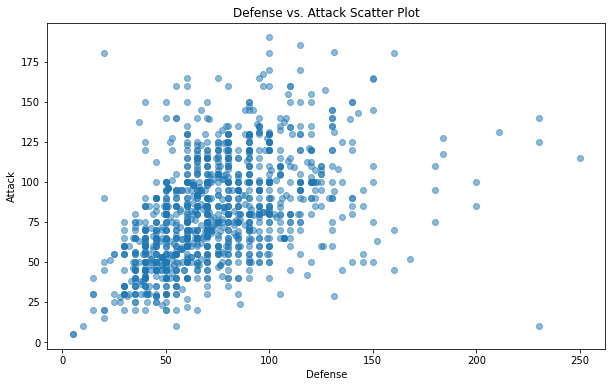

In [14]:
# Scatter Plot Visualization 

# Extract Defense and Attack columns from the DataFrame
defense_values = df['Defense']
attack_values = df['Attack']


# Set the size of the scatter plot
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(defense_values, attack_values, alpha=0.5)

# Add labels and title
plt.xlabel('Defense')
plt.ylabel('Attack')
plt.title('Defense vs. Attack Scatter Plot')

# Show the plot
plt.show()

In [16]:
# plot the scatter plot func

def scatter(df):
    fig = px.scatter(df, x="Attack", y="Defense",
                   size='Total', hover_data=['Names','Type1', 'Total'])
    
    # update the layout
    fig.update_layout(title='Pokemon Species: Strength vs Weakness',
                  xaxis_title='Attack',
                  yaxis_title='Defense',
                  title_font_family="Sitka Small",
                  title_font_color="Black",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17
                 )
    fig.show()
scatter(df)

In [44]:
# Function to create the scatter plot with annotations for images and a line of best fit
def scatter_with_trendline(df):
    fig = px.scatter(df, x="Attack", y="Defense",
                     size='Total', hover_data=['Names', 'Type1', 'Total'],
                     trendline='ols')  # Adding a line of best fit using ordinary least squares regression (OLS)
    
    # update the layout
    fig.update_layout(title='Pokemon Species: Strength vs Weakness',
                      xaxis_title='Attack',
                      yaxis_title='Defense',
                      title_font_family="Sitka Small",
                      title_font_color="Black",
                      title_font_size=22,
                      xaxis_title_font_color='black',
                      xaxis_title_font_size=17,
                      yaxis_title_font_color='black',
                      yaxis_title_font_size=17
                      )
    
    fig.show()

# Call the scatter_with_trendline function to display the scatter plot with a line of best fit
scatter_with_trendline(df)


In [46]:
# Assuming you already have the DataFrame 'df' containing Pokémon data

def scatter(df):
    # Filter the DataFrame to include only Pokémon with Total >= 700 or Total <= 200
    filtered_df = df[(df['Total'] >= 700) | (df['Total'] <= 200)]
    
    fig = px.scatter(filtered_df, x="Attack", y="Defense",
                     size='Total', hover_data=['Names','Type1', 'Type2', 'Total'])

    # Update the layout
    fig.update_layout(title='Pokemon Species: Strength vs Weakness',
                      xaxis_title='Attack',
                      yaxis_title='Defense',
                      title_font_family="Sitka Small",
                      title_font_color="Black",
                      title_font_size=22,
                      xaxis_title_font_color='black',
                      xaxis_title_font_size=17,
                      yaxis_title_font_color='black',
                      yaxis_title_font_size=17
                     )
    fig.show()

# Call the function to plot the scatter plot
scatter(df)

In [22]:
def scatter_with_line_of_best_fit(df):
    # Filter the DataFrame to include only Pokémon with Total >= 700 or Total <= 200
    filtered_df = df[(df['Total'] >= 700) | (df['Total'] <= 200)]
    
    fig = px.scatter(filtered_df, x="Attack", y="Defense",
                     size='Total', hover_data=['Names','Type1', 'Total'])

    # Calculate the coefficients of the line of best fit (linear regression)
    coefficients = np.polyfit(filtered_df['Attack'], filtered_df['Defense'], 1)
    slope, intercept = coefficients

    # Generate the points for the line of best fit
    x_line = np.linspace(filtered_df['Attack'].min(), filtered_df['Attack'].max(), 100)
    y_line = slope * x_line + intercept

    # Add the line of best fit to the scatter plot
    fig.add_scatter(x=x_line, y=y_line, mode='lines', name='Line of Best Fit')

    # Update the layout
    fig.update_layout(title='Pokemon Species: Strength vs Weakness',
                      xaxis_title='Attack',
                      yaxis_title='Defense',
                      title_font_family="Sitka Small",
                      title_font_color="Black",
                      title_font_size=22,
                      xaxis_title_font_color='black',
                      xaxis_title_font_size=17,
                      yaxis_title_font_color='black',
                      yaxis_title_font_size=17
                     )
    fig.show()

# Call the function to plot the scatter plot with the line of best fit
scatter_with_line_of_best_fit(df)

In [29]:
import requests
import os

#df = pd.read_csv("pokemon.csv")

# Create a directory to save the images
output_dir = "images"  # Choose the directory name
os.makedirs(output_dir, exist_ok=True)

# Iterate over the image URLs and download all the images
for index, row in df.iterrows():
    image_url = row['image_url']
    image_name = row['Names'] + ".png"  # Use the 'Names' column as the image name
    image_path = os.path.join(output_dir, image_name)

    try:
        response = requests.get(image_url)
        with open(image_path, 'wb') as f:
            f.write(response.content)
        print(f"Image downloaded: {image_name}")
    except Exception as e:
        print(f"Error downloading image: {image_url}\n{e}")

print("All images downloaded successfully!")


Image downloaded: Bulbasaur.png
Image downloaded: Ivysaur.png
Image downloaded: Venusaur.png
Image downloaded: Venusaur Mega Venusaur.png
Image downloaded: Charmander.png
Image downloaded: Charmeleon.png
All images downloaded successfully!


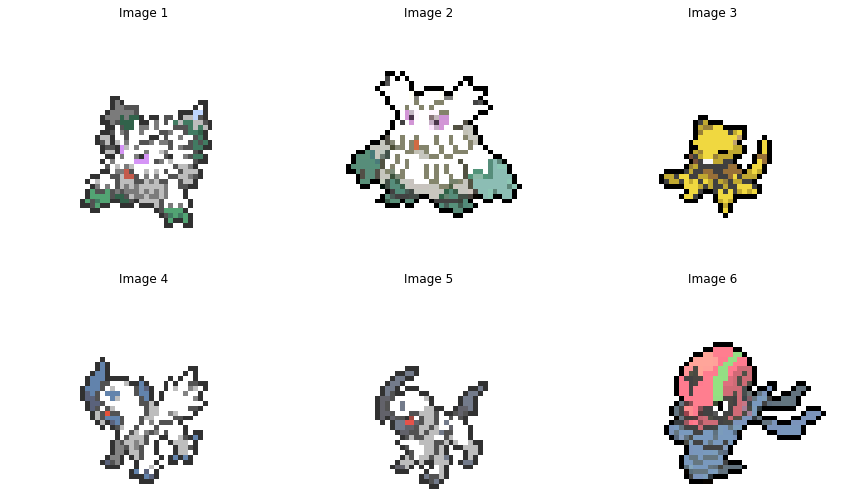

In [30]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Directory where the images are saved
image_dir = "images"  # Replace with your directory name

# Get the list of image filenames
image_files = os.listdir(image_dir)

# Display the images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(image_dir, image_files[i])
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

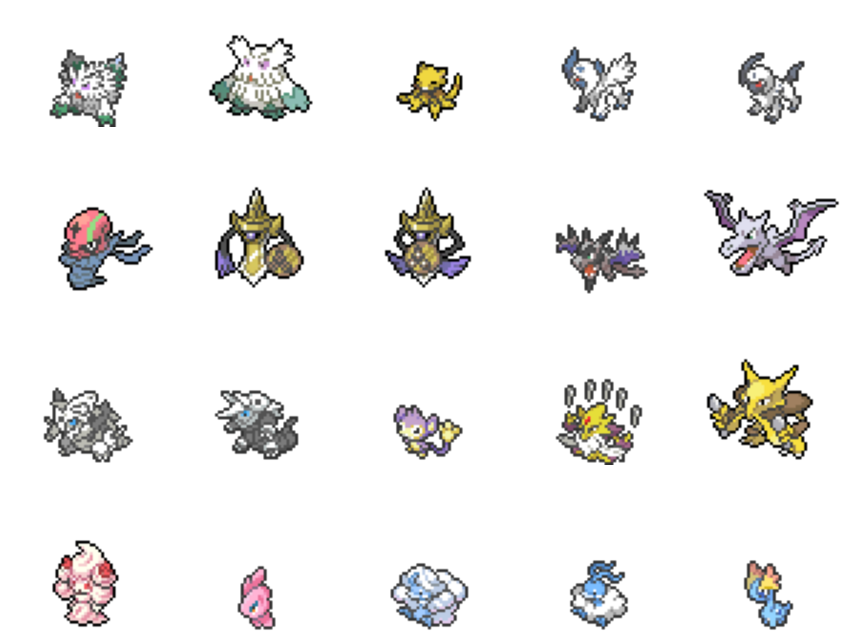

In [43]:
# Get the list of image files
image_files = os.listdir(image_dir)

# Define the number of rows and columns for the grid
num_rows = 4
num_cols = 5

# Create the figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate over the image files and plot them in the grid
for i, ax in enumerate(axes.flatten()):
    # Load and display the image
    img_path = os.path.join(image_dir, image_files[i])
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the grid of Pokémon images
plt.show()


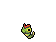
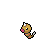
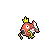
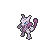
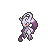
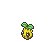
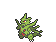
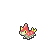
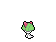
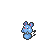
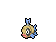
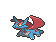
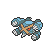
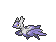
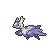
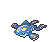
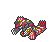
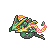
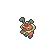
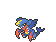
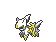
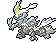
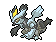
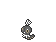
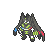
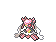
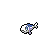
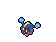
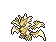
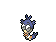
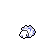
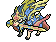
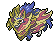
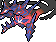

In [51]:
import pandas as pd
import plotly.express as px
import numpy as np
import os
from PIL import Image

# Assuming you already have the DataFrame 'df' containing Pokémon data

def scatter_with_line_of_best_fit(df):
    # Filter the DataFrame to include only Pokémon with Total >= 700 or Total <= 200
    filtered_df = df[(df['Total'] >= 700) | (df['Total'] <= 200)]
    
    # Extract Defense and Attack columns from the filtered DataFrame
    defense_values = filtered_df['Defense']
    attack_values = filtered_df['Attack']

    # Create a list to store the image objects
    images = []

    # Specify the path to the image folder
    image_folder = 'images/'

    # Iterate through the DataFrame and load images from the image folder
    for index, row in filtered_df.iterrows():
        image_path = os.path.join(image_folder, row['Names'] + '.png')
        image = Image.open(image_path)
        images.append(image)

    # Create a new DataFrame to store the image data
    df_images = pd.DataFrame({'Defense': defense_values, 'Attack': attack_values, 'Images': images})

    # Use Plotly Express to create the scatter plot with images
    fig = px.scatter(df_images, x="Attack", y="Defense", hover_data=[filtered_df['Names'], filtered_df['Type1'],filtered_df['HP'],filtered_df['Total']],
                     labels={'Attack': 'Attack', 'Defense': 'Defense'},
                     color_discrete_sequence=px.colors.qualitative.Pastel)

    # Add annotations for images
    for index, row in df_images.iterrows():
        fig.add_layout_image(
            dict(
                source=row['Images'],
                x=row['Attack'],
                y=row['Defense'],
                xref="x",
                yref="y",
                sizex=30,
                sizey=30,
                xanchor="center",
                yanchor="middle"
            )
        )

    # Set the size range for the image annotations
    fig.update_xaxes(range=[0, filtered_df['Attack'].max() + 20])
    fig.update_yaxes(range=[0, filtered_df['Defense'].max() + 20])

    # Update the layout
    fig.update_layout(title='Pokemon Species: Strength vs Weakness',
                      xaxis_title='Attack',
                      yaxis_title='Defense',
                      title_font_family="Sitka Small",
                      title_font_color="Black",
                      title_font_size=22,
                      xaxis_title_font_color='black',
                      xaxis_title_font_size=17,
                      yaxis_title_font_color='black',
                      yaxis_title_font_size=17
                      )

    # Show the plot
    fig.show()

# Call the function to plot the scatter plot with the line of best fit and the images
scatter_with_line_of_best_fit(df)


In [56]:
# Filter the DataFrame to include only Pokémon with Total >= 700 or Total <= 200
filtered_df = df[(df['Total'] >= 700) | (df['Total'] <= 200)]

# List the Pokémon with Total >= 700
pokemon_total_greater_equal_700 = filtered_df[filtered_df['Total'] >= 700]

# List the Pokémon with Total <= 200
pokemon_total_less_equal_200 = filtered_df[filtered_df['Total'] <= 200]

# Display the lists
print("Pokémon with Total >= 700:")
print(pokemon_total_greater_equal_700[['Names', 'Type1', 'Total']])

print("\nPokémon with Total <= 200:")
print(pokemon_total_less_equal_200[['Names', 'Type1', 'Total']])


Pokémon with Total >= 700:
                         Names     Type1  Total
201       Mewtwo Mega Mewtwo X   Psychic    780
202       Mewtwo Mega Mewtwo Y   Psychic    780
312   Tyranitar Mega Tyranitar      Rock    700
458   Salamence Mega Salamence    Dragon    700
462   Metagross Mega Metagross     Steel    700
467         Latias Mega Latias    Dragon    700
469         Latios Mega Latios    Dragon    700
471       Kyogre Primal Kyogre     Water    770
473     Groudon Primal Groudon    Ground    770
475     Rayquaza Mega Rayquaza    Dragon    780
545     Garchomp Mega Garchomp    Dragon    700
605                     Arceus    Normal    720
776        Kyurem White Kyurem    Dragon    700
777        Kyurem Black Kyurem    Dragon    700
865     Zygarde Complete Forme    Dragon    708
867       Diancie Mega Diancie      Rock    700
961    Necrozma Ultra Necrozma   Psychic    754
1054      Zacian Crowned Sword     Fairy    700
1056  Zamazenta Crowned Shield  Fighting    700
1058       Et

In [58]:
pip install pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install ipython


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Pokémon with Total >= 700 (Strength):
Mewtwo Mega Mewtwo X


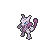

Mewtwo Mega Mewtwo Y


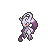

Tyranitar Mega Tyranitar


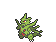

Salamence Mega Salamence


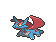

Metagross Mega Metagross


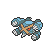

Latias Mega Latias


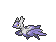

Latios Mega Latios


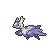

Kyogre Primal Kyogre


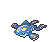

Groudon Primal Groudon


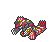

Rayquaza Mega Rayquaza


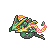

Garchomp Mega Garchomp


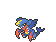

Arceus


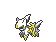

Kyurem White Kyurem


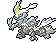

Kyurem Black Kyurem


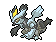

Zygarde Complete Forme


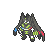

Diancie Mega Diancie


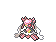

Necrozma Ultra Necrozma


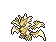

Zacian Crowned Sword


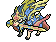

Zamazenta Crowned Shield


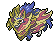

Eternatus Eternamax


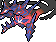


Pokémon with Total <= 200 (Weakness):
Caterpie


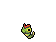

Weedle


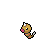

Magikarp


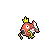

Sunkern


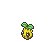

Wurmple


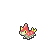

Ralts


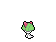

Azurill


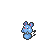

Feebas


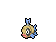

Kricketot


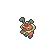

Scatterbug


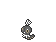

Wishiwashi Solo Form


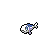

Cosmog


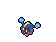

Blipbug


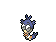

Snom


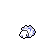

In [64]:
from PIL import Image
from IPython.display import display
import os

# Function to display Pokémon image given the image file path
def display_pokemon_image(image_file_path):
    try:
        img = Image.open(image_file_path)
        display(img)
    except Exception as e:
        print(f"Error loading image from file: {image_file_path}")
        print(e)

# Filter the DataFrame to include only Pokémon with Total >= 700 or Total <= 200
filtered_df = df[(df['Total'] >= 700) | (df['Total'] <= 200)]

# List the Pokémon with Total >= 700
pokemon_total_greater_equal_700 = filtered_df[filtered_df['Total'] >= 700]

# List the Pokémon with Total <= 200
pokemon_total_less_equal_200 = filtered_df[filtered_df['Total'] <= 200]

# Image folder path
image_folder = "images/"

# Display Pokémon images for >=700 for strength
print("Pokémon with Total >= 700 (Strength):")
for _, row in pokemon_total_greater_equal_700.iterrows():
    image_file_path = os.path.join(image_folder, row['Names'] + ".png")
    print(row['Names'])
    display_pokemon_image(image_file_path)

# Display Pokémon images for <=200 for weakness
print("\nPokémon with Total <= 200 (Weakness):")
for _, row in pokemon_total_less_equal_200.iterrows():
    image_file_path = os.path.join(image_folder, row['Names'] + ".png")
    print(row['Names'])
    display_pokemon_image(image_file_path)


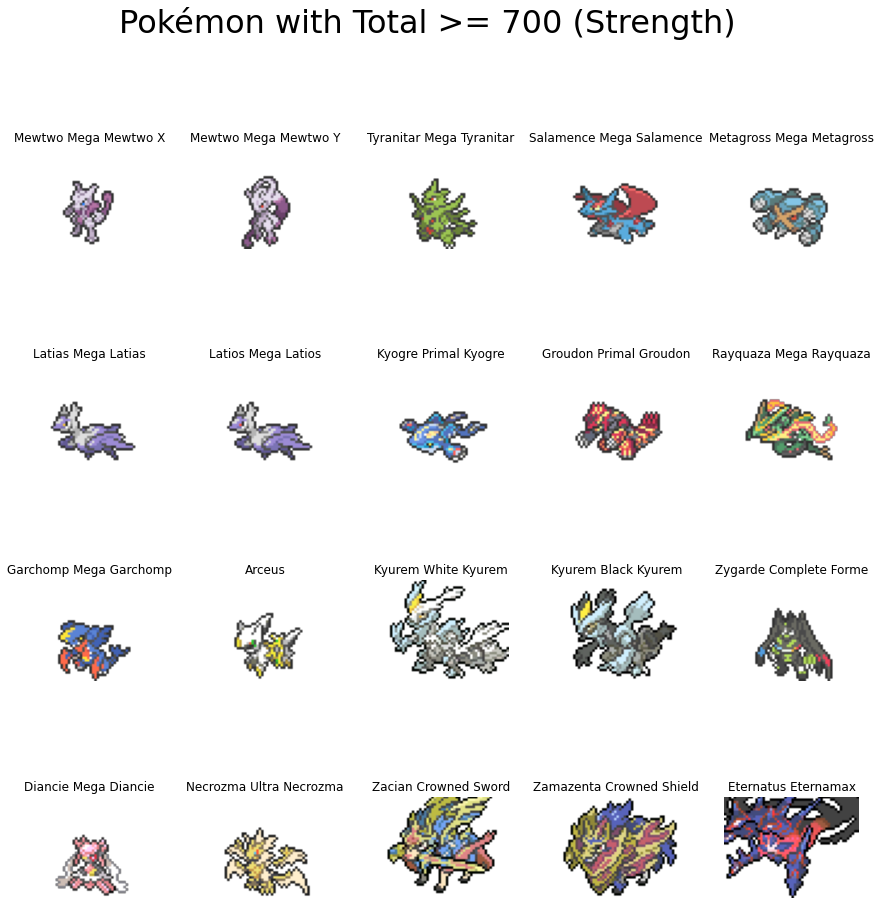

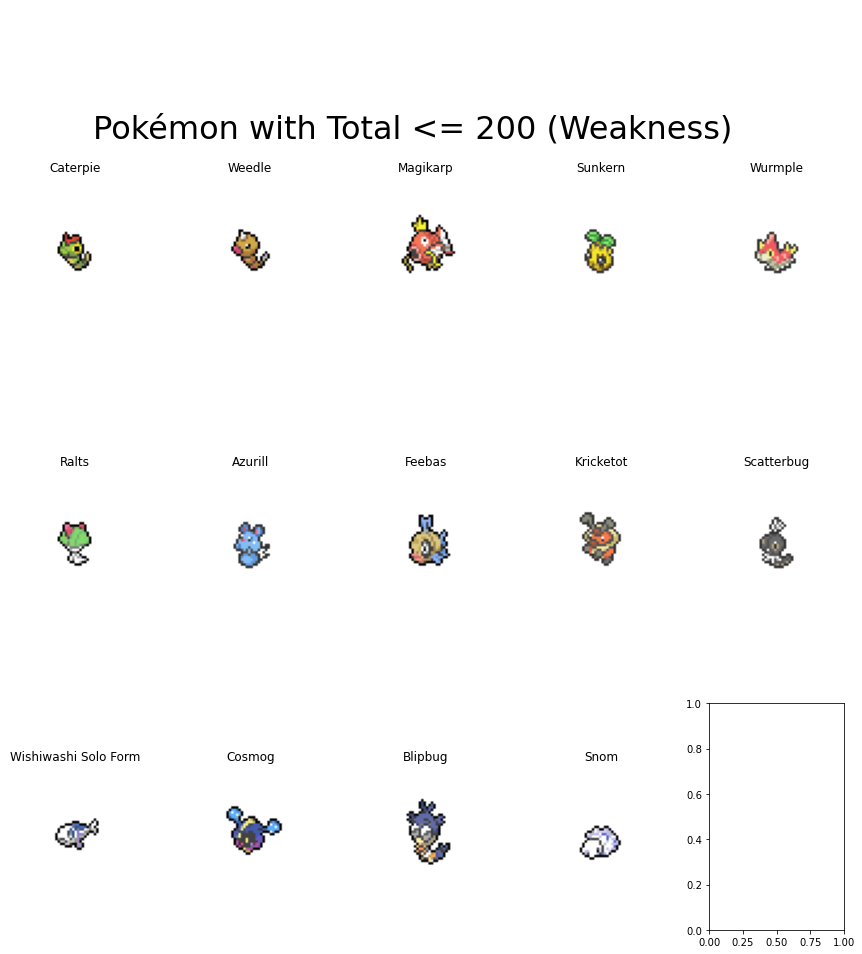

In [66]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import math

# Function to display Pokémon image given the image file path
def display_pokemon_image(image_file_path):
    try:
        img = Image.open(image_file_path)
        return img
    except Exception as e:
        print(f"Error loading image from file: {image_file_path}")
        print(e)
        return None

# Filter the DataFrame to include only Pokémon with Total >= 700 or Total <= 200
filtered_df = df[(df['Total'] >= 700) | (df['Total'] <= 200)]

# List the Pokémon with Total >= 700
pokemon_total_greater_equal_700 = filtered_df[filtered_df['Total'] >= 700]

# List the Pokémon with Total <= 200
pokemon_total_less_equal_200 = filtered_df[filtered_df['Total'] <= 200]

# Image folder path
image_folder = "images/"

# Calculate the number of rows and columns for the grid
num_pokemon_per_row = 5
num_rows_strength = math.ceil(len(pokemon_total_greater_equal_700) / num_pokemon_per_row)
num_rows_weakness = math.ceil(len(pokemon_total_less_equal_200) / num_pokemon_per_row)

# Create subplots for strength and weakness grids
fig, axs = plt.subplots(nrows=num_rows_strength, ncols=num_pokemon_per_row, figsize=(15, 15))
fig.suptitle("Pokémon with Total >= 700 (Strength)", fontsize=32)

# Display Pokémon images for >=700 for strength
for i, (_, row) in enumerate(pokemon_total_greater_equal_700.iterrows()):
    image_file_path = os.path.join(image_folder, row['Names'] + ".png")
    img = display_pokemon_image(image_file_path)
    if img is not None:
        ax = axs[i // num_pokemon_per_row, i % num_pokemon_per_row]
        ax.imshow(img)
        ax.set_title(row['Names'])
        ax.axis('off')

# Adjust layout to remove empty subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Create subplots for weakness grid
fig, axs = plt.subplots(nrows=num_rows_weakness, ncols=num_pokemon_per_row, figsize=(15, 15))
fig.suptitle("\n\n\nPokémon with Total <= 200 (Weakness)", fontsize=32)

# Display Pokémon images for <=200 for weakness
for i, (_, row) in enumerate(pokemon_total_less_equal_200.iterrows()):
    image_file_path = os.path.join(image_folder, row['Names'] + ".png")
    img = display_pokemon_image(image_file_path)
    if img is not None:
        ax = axs[i // num_pokemon_per_row, i % num_pokemon_per_row]
        ax.imshow(img)
        ax.set_title(row['Names'])
        ax.axis('off')

# Adjust layout to remove empty subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plots
plt.show()
